# 7 MARCH; MATPLOTLIB

# Step 1: initial exploration of the data

In [19]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv('C:/Users/mohd tareq siddiqui/Desktop/DS ML Files/Indicators.csv')
data.shape

(1048575, 6)

This is a really large dataset, atleast in terms of of the numbers of rows. But with 6 columns, what does this hold

In [21]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Looks like it has different indicators for different countries with the year & value of the indicator

# How many UNIQUE country names are there?

In [22]:
countries=data['CountryName'].unique() #tolist=converts data into list
len(countries)

247

# Are there same number of country codes?

In [23]:
# How many uique country codes are there? (Should be the same)
countryCodes=data['CountryCode'].unique()
len(countryCodes)

247

# Are there many indicators or few?

In [24]:
# How many unique indicators are there? (Should be the same)
indicators=data['IndicatorName'].unique().tolist()
len(indicators)

758

# How many years of data do we have?

In [25]:
# How many years of data do we have?
years=data['Year'].unique().tolist()
len(years)

21

# Whats the range of years

In [26]:
print(str(min(years))+'to'+str(max(years)))

1960to1980


# Matplotlib: Basic Plotting, Part 1

Lets pick a country and an indicator to explore: CO2 emissions per capita & the USA

In [27]:
# Select CO2 emissions for the US
hist_indicator='CO2 emissions \(metric'
hist_country='USA'

mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['CountryCode'].str.contains(hist_country)

# stage is just those indicators mathcing the USA for country code & CO2 emissions over time
stage=data[mask1 & mask2]

In [28]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013938
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


# Lets see how emissions have change over time

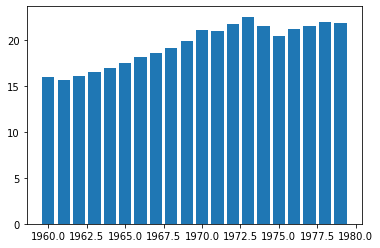

In [29]:
# get the years
years=stage['Year'].values
# get the values
co2=stage['Value'].values

#create
plt.bar(years,co2)
plt.show()

Turns out emissions per capita have dropped a bit over time, but lets make this graphic a bit more appealing before we continue to explore it

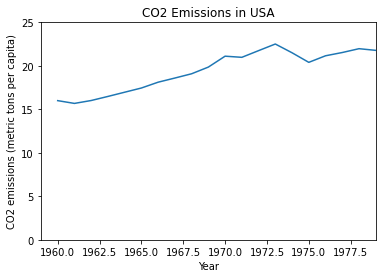

In [30]:
# Switch to a line plot
plt.plot(stage['Year'].values,stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start the y axis at 0
plt.axis([1959,1979,0,25])

plt.show()

# Using histograms to explore the distribution of values

We could also visualize this data as a histogram to better explore the ranges of value in CO2 production per year

In [31]:
# If you want to just include those within one standard deviation for the mean, you could do the following
# lower=stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data=[x for x in stage[:10000]['Value'] if x>lower and x<upper]

# Otherwise, lets look at all the data
hist_data=stage['Value'].values

In [32]:
print(len(hist_data))

20


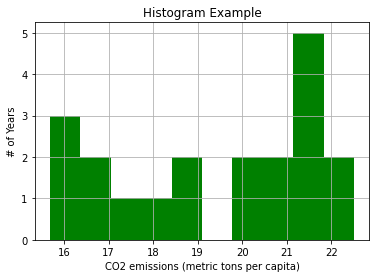

In [33]:
# The histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')
# density = false means our width of bar will be same
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

So the USA has many years where it produced between 19-20 metric tons per capita with outliers on wither side

# But how do the USA's numbers relate to those of other countries

In [34]:
# Select co2 emissions for all the countries in 1975
hist_year='CO2 emisiosns \(metric'
hist_year=1975

mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['Year'].isin([hist_year])

# apply our mark
co2_1975=data[mask1 & mask2]
co2_1975.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
637891,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1975,2.199429
638152,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1975,6.098520
638363,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1975,9.719036
638526,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1975,1.783524
638799,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1975,1.060786


For hw many countries dowe have CO2 per capita emissions data in 1975

In [35]:
print(len(co2_1975))

192


Text(0.5, 1.0, 'Histogram of CO2 Emissions Per Capita')

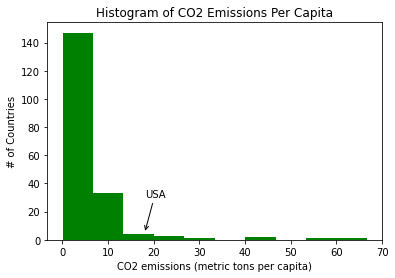

In [37]:
# Lets plot a histogram of the emissions per capita by country

# Subplots returns a touple with the figure, axis of attributes
fig,ax=plt.subplots()

ax.annotate('USA',
            xy=(18,5), xycoords='data',
            xytext=(18,30),textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3'),
            )
plt.hist(co2_1975['Value'],10,density=False, facecolor='green')
# density: width of your bins false will have all same size of bins
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10,22,0,14])

So the USA at 18 CO2 emissions (metric tons per capita) is quite high among all countries

An interesting next step, wich we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values 

# Matplotlib: Basic Plotting, Part 2

Relationship between GDP & CO2 Emissions in USA

In [53]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [54]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.70776
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.40966


In [55]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


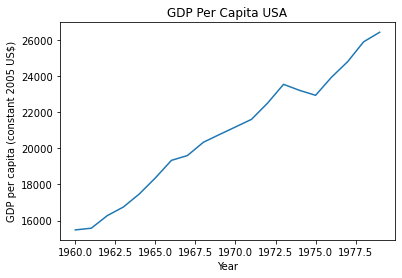

In [56]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1969, 1979,0,25])

plt.show()

# ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [57]:
print('GDP Min Year=',gdp_stage['Year'].min(),'max:',gdp_stage['Year'].max())
print('CO2 Min Year=',stage['Year'].min(),'max:',stage['Year'].max())

GDP Min Year= 1960 max: 1979
CO2 Min Year= 1960 max: 1979


In [62]:
# gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage))
print(len(stage))

20
20


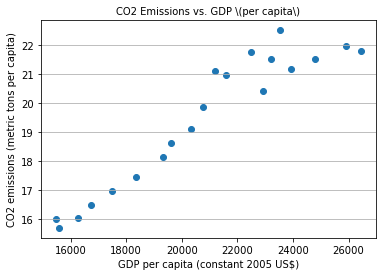

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage['Value'] #gdp usa
Y = stage['Value'] #co2 usa

axis.scatter(X, Y)
plt.show()

In [60]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.94865659],
       [0.94865659, 1.        ]])